# Прогноз оттока пользователей в фитнес-центрах

**Описание проекта**


Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.

Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.

Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.

Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся. Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Ваша задача — провести анализ и подготовить план действий по удержанию клиентов.

А именно:
научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента; сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства; проанализировать основные признаки, наиболее сильно влияющие на отток; сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
1) выделить целевые группы клиентов;

2) предложить меры по снижению оттока;

3) определить другие особенности взаимодействия с клиентами.

Импорт необходимых библиотек:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

# Шаг 1. Загрузка данных. 

## Загрузка данных

In [2]:
data = pd.read_csv('/datasets/gym_churn.csv')
data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


# Шаг 2. Исследовательский анализ данных (EDA)

## Общая информация о датафрейме:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


**Выводы:** Пропуски в данных отсутствуют, форматы данных верные.

In [4]:
data.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


**Выводы:** 
1. Аномальных значений нет. 
2. Мужчин и женщин практически одинаковое количество.
3. Большинство клиентов проживает рядом с фитнес-центром.
4. Почти половина клиентов сотрудники компаний-партнёров.
5. Почти 31% клиентов пришли по акции "Приведи друга".
6. Телефон указан у 90% клиентов.
7. Средняя длительность абонемента составляет 4.68 месяца.
8. 41% клиентов посещает групповые занятия.
9. Средний возраст клиента 29 лет.
10. Средняя суммарная выручка по другим услугам фитнес-центра 146.94.
11. Средний срок до окончания абонемента 4.32 месяца.
12. Средний срок с момента первого обращения 3.72 месяца.
13. В среднем фитнес-центр клиенты посещают фитнес-центр 2 раза в неделю.
14. Средняя частота посещений в месяц 1.77. 
15. Отток составляет 26%

Сгруппирую данные по признаку "Отток", для сравнения средних по каждому признаку:

In [5]:
data_churn = data.groupby('Churn').mean()
data_churn

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


## Построю столбчатые гистограммы и распределения признаков для тех, кто ушёл и тех, кто остался:

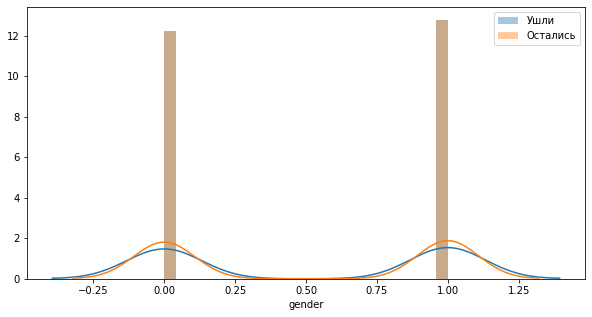

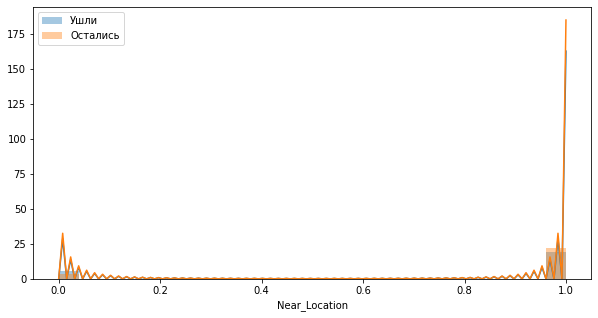

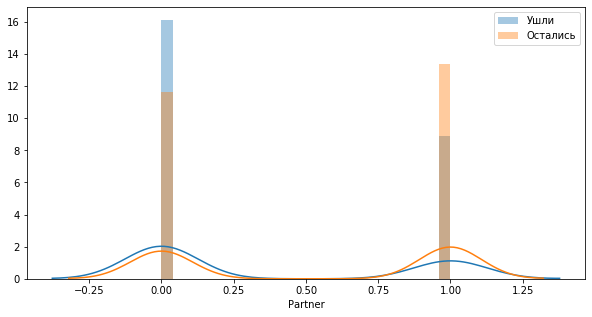

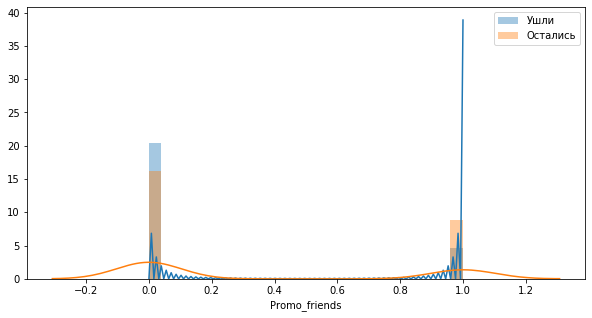

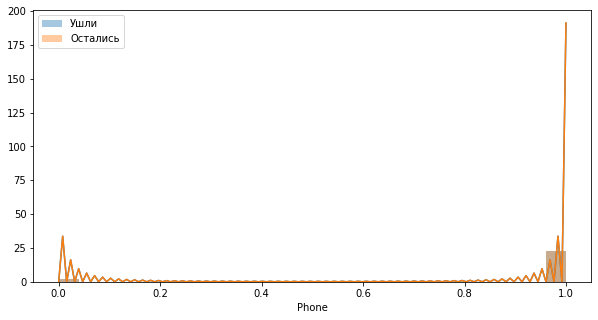

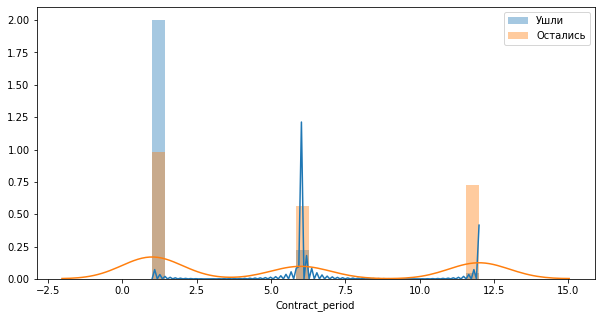

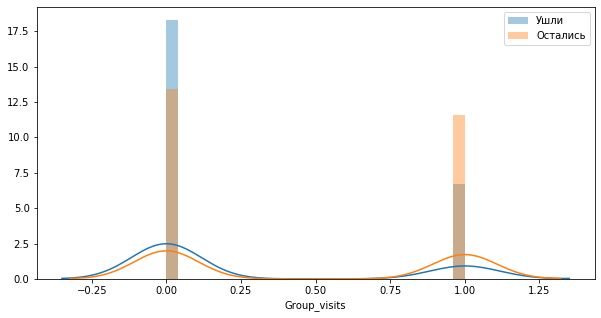

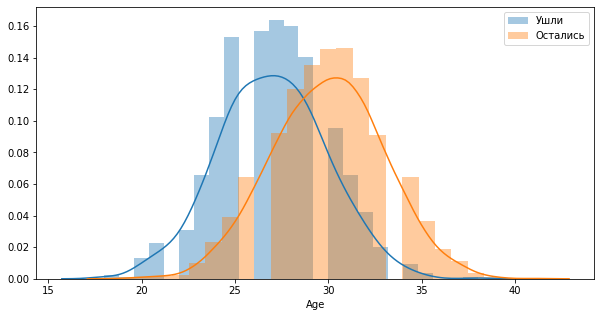

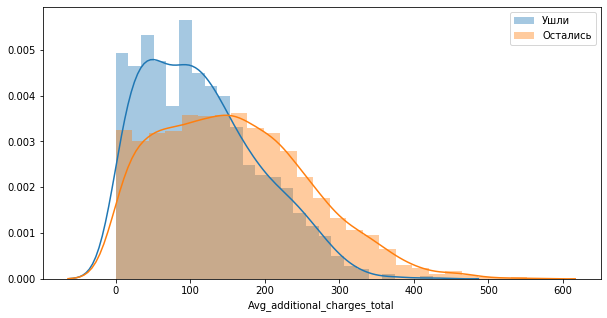

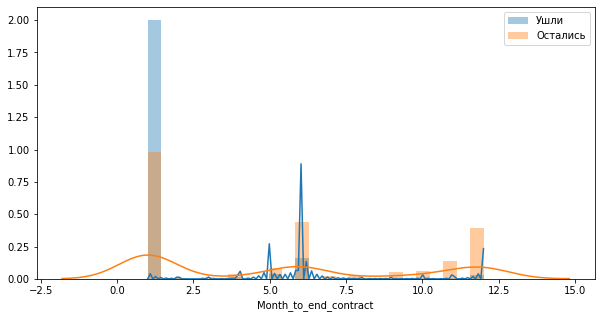

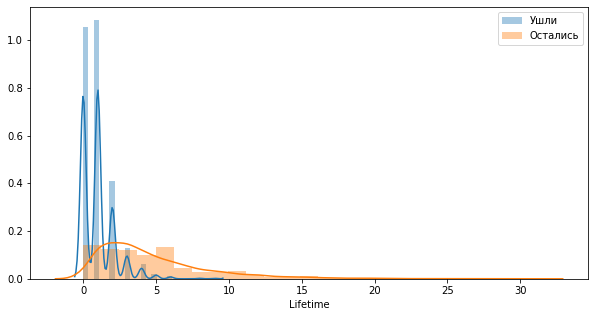

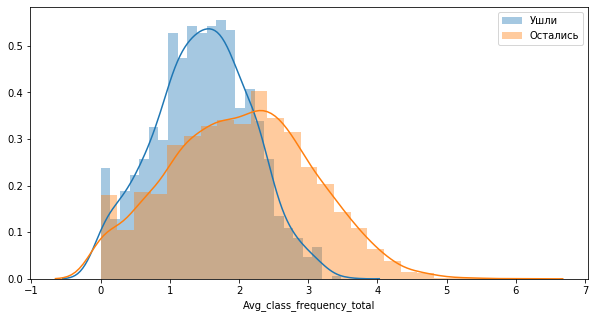

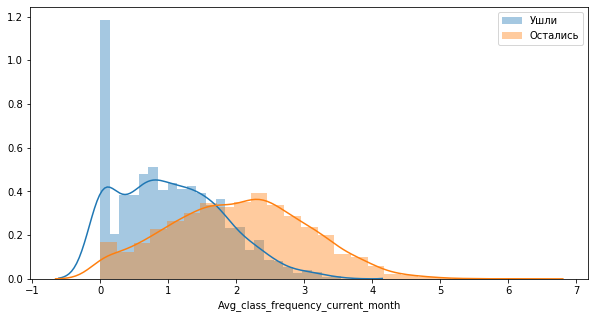

/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


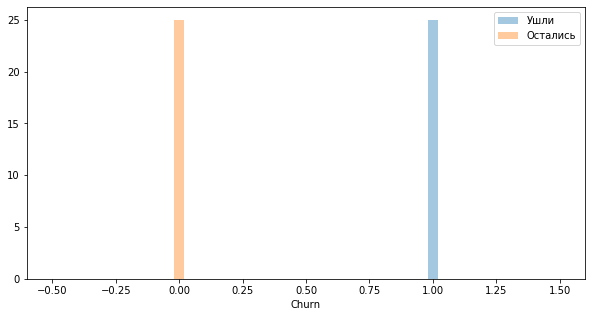

In [6]:
left = data[data['Churn']==1]
stayed = data[data['Churn']==0]
for column in data.columns:
    plt.figure(figsize = (10, 5))
    ax = sns.distplot(left[column], bins=25)
    ax = sns.distplot(stayed[column], bins=25)
    ax.set(xlabel = column)
    plt.legend(['Ушли', 'Остались'])
    plt.show()

**Выводы:** 
1. Нельзя сказать, что мужчины или женнщины уходят чаще, доли практически равны.
2. Ближе живущие клиенты уходят реже на 11%.
3. Сотрудники компаний-партнеров остаются чаще.
4. Клиенты, которые пришли по акции "Приведи друга" уходят в два раза реже.
5. Наличие номера телефона практически одинаково в обеих группах.
6. Средняя длительность абоненмента у клиентов, которые остались 5.74 месяца, у клиентов которые ушли гораздо ниже - 1.72 месяца.
7. Оставшиеся клиенты чаше ходят на групповые занятия.
8. Возвраст клиентов из группы оттока 26 лет, у оставшихся клиентов средний возраст 29 лет. 
9. Средняя суммарная выручка по другим услугам фитнес-центра отличается, выше у тех клиентов, кто остался.
10. Средний срок до окончания абонемента, очевидно, больше у тех, кто остается.
11. Средний срок с момента первого обращения больше практически в 4 раза у тех, кто остался, у клиентов в оттоке этот срок составляет 0.99 месяца.
12. У клиентов из группы оттока среднее количество посещений меньше.
13. У тех, кто остался среднее количество посещений в месяц больше в два раза.

## Построю матрицу корреляции признаков:

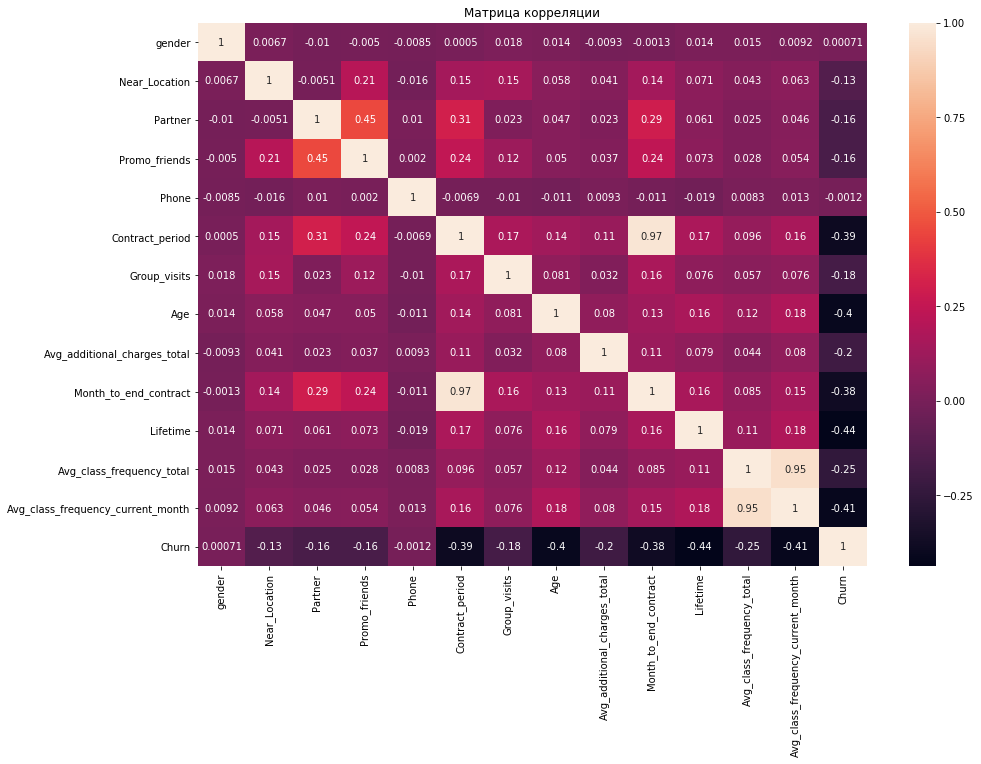

In [7]:
cm = data.corr()
plt.figure(figsize = (15, 10))
ax = sns.heatmap(cm, annot=True)
ax.set(title = 'Матрица корреляции')
plt.show()

**Выводы:**
1. Признаки с нулевой корреляцией с целевой переменной, это наличие номера и пол клиента, они не влияют на отток. 
2. Наиболее сильно влияют на отток: время с момента первого обращения в фитнес-центр, количество посещений в месяц, возраст, длительность текущего действующего абонемента.

# Шаг 3. Модели прогнозирования оттока клиентов

Разделю данные на признаки (матрица X) и целевую переменную  — факт оттока клиента в следующем месяце(y)

In [8]:
X = data.drop('Churn', axis = 1)
y = data['Churn']

Разделю модель на обучающую и валидационную выборку

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## **Метод логистической регрессией:**

Обучу модель на train-выборке

In [10]:
model = LogisticRegression(solver='liblinear') 
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Воспользуюсь моделью, чтобы сделать прогнозы

In [11]:
predictions = model.predict(X_test)
probabilities = model.predict_proba(X_test)[:,1]

Расчёт метрик:

In [12]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))

Accuracy: 0.93
Precision: 0.86
Recall: 0.83


## **Модель случайный лес:**

Для нормализации и стандартизации данных использую класс StandartScaler и применю данные к выборке:

In [13]:
sc = StandardScaler()
sc.fit(X_train)

X_train_st = sc.transform(X_train)
X_test_st = sc.transform(X_test)

Обучу модель на train-выборке

In [14]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state=0)
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Воспользуюсь моделью, чтобы сделать прогнозы

In [15]:
rf_predictions = rf_model.predict(X_test_st) 
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]

Расчёт метрик:

In [16]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))

Accuracy: 0.93
Precision: 0.86
Recall: 0.83


**Выводы:** 

Обе модели показывают одинаково хороший результат.

# Шаг 4. Кластеризация клиентов

Данные уже стандартизированы ранее, передам данные функции и построю дендрограмму

In [17]:
X_sc = sc.fit_transform(X)
linked = linkage(X_sc, method = 'ward') 

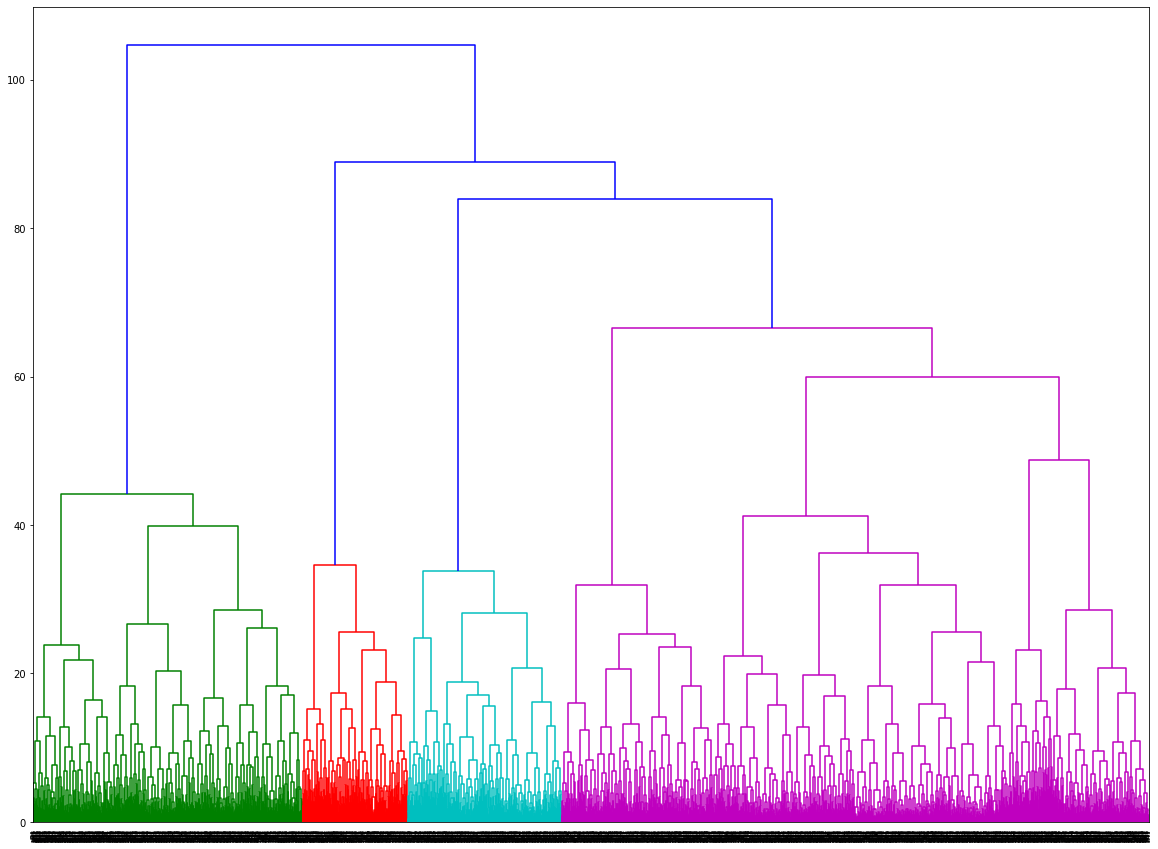

In [18]:
plt.figure(figsize=(20, 15))  
dendrogram(linked, orientation='top')
plt.show() 

Задаю число кластеров, равное 5. На основании алгоритма K-Means прогнозирую кластеры клиентов.

In [19]:
km = KMeans(n_clusters = 5, random_state=0) 
labels = km.fit_predict(X_sc) 

Сгруппирую данные по кластерам, чтобы посмотреть средние значения признаков:

In [20]:
data['Churn km'] = labels
data.groupby(['Churn km']).mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
Churn km,,,,,,,,,,,,,,
0,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967,0.266839
1,0.482484,0.722930,0.296178,0.014331,1.0,1.904459,0.274682,28.113854,129.705748,1.812898,2.203025,1.252246,0.999334,0.563694
2,0.496000,0.948800,0.820800,0.998400,1.0,3.043200,0.441600,29.105600,141.442154,2.848000,3.737600,1.725976,1.619798,0.256000
3,0.500000,0.936636,0.739631,0.479263,1.0,11.834101,0.546083,29.883641,163.489724,10.790323,4.708525,1.997638,1.989819,0.021889
4,0.565318,0.848555,0.275145,0.067052,1.0,2.676301,0.449711,30.042775,160.566137,2.478613,4.841618,2.791732,2.783879,0.082081


**Выводы:** 
1. Наибольший отток в кластерах 0 - 51%, 2 - 44%, 4 - 27%.
2. В класетарх 1 и 3 отток гораздо меньше - 7% и 3%.

## Распределения признаков для кластеров.


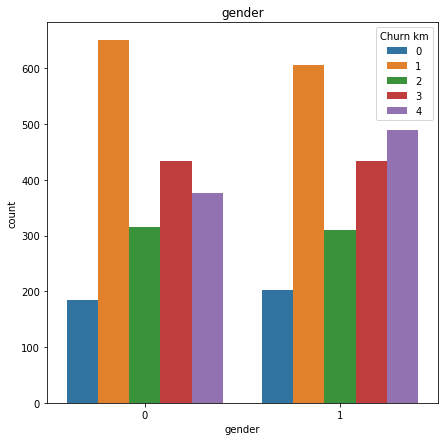

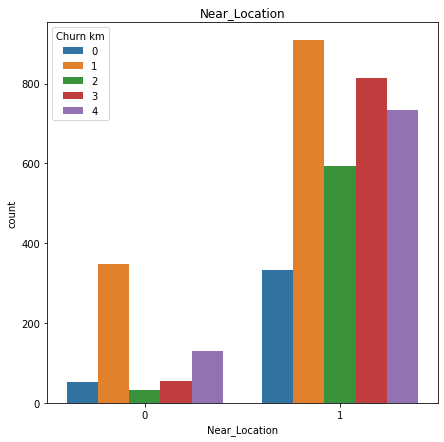

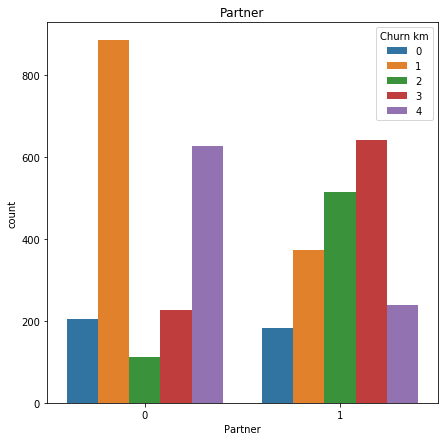

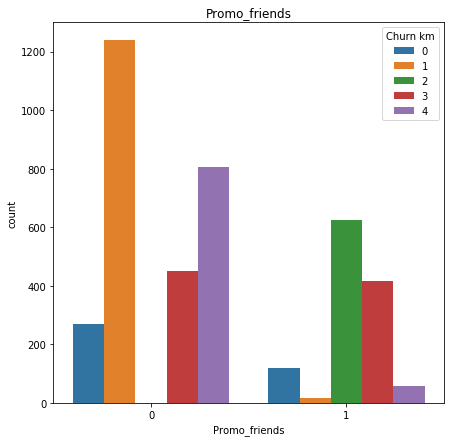

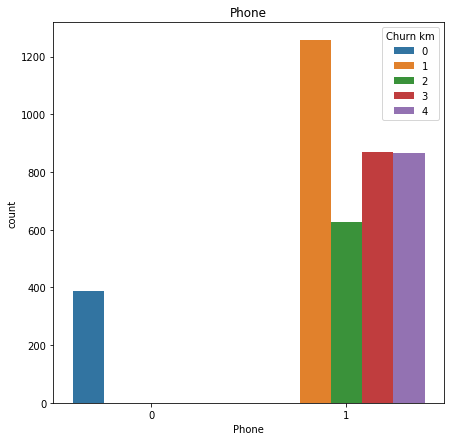

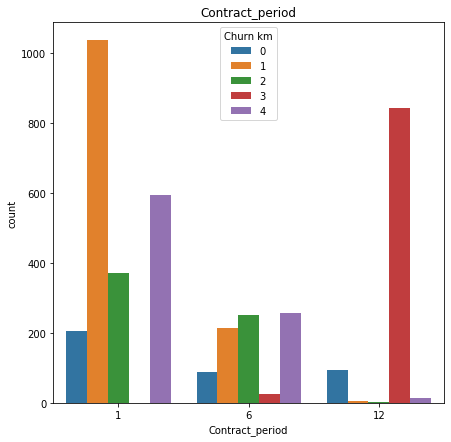

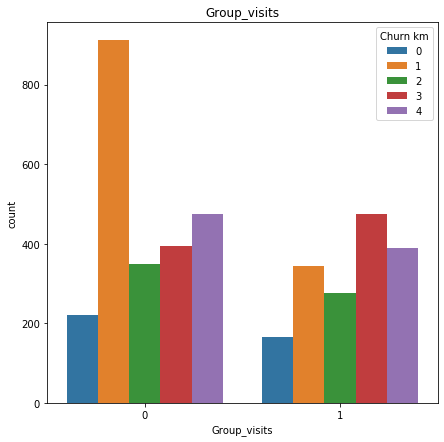

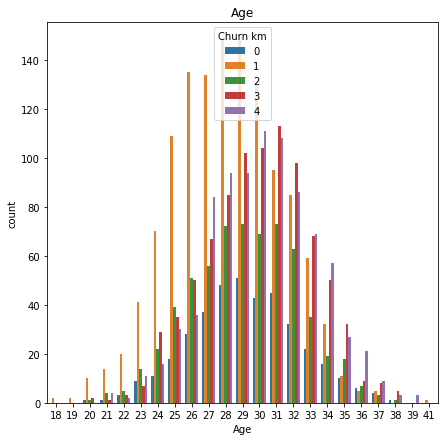

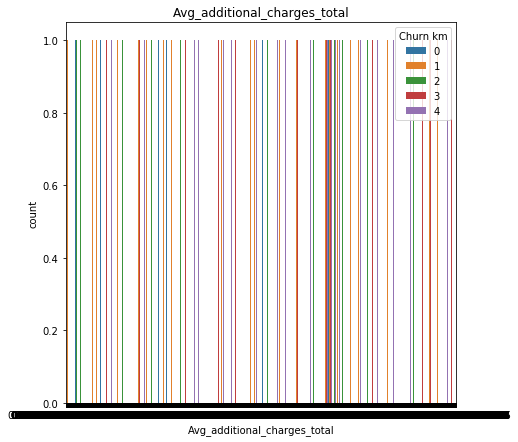

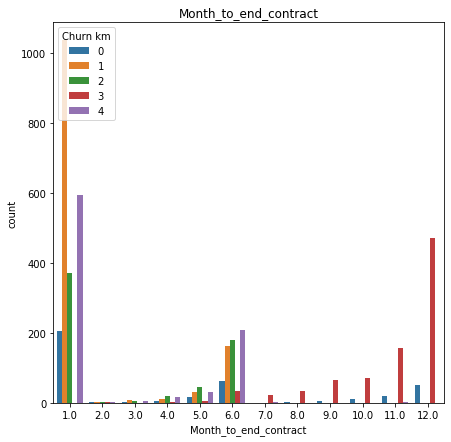

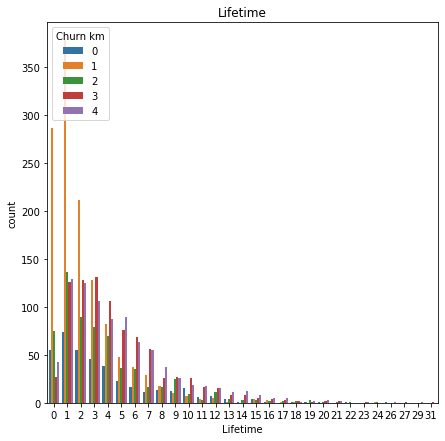

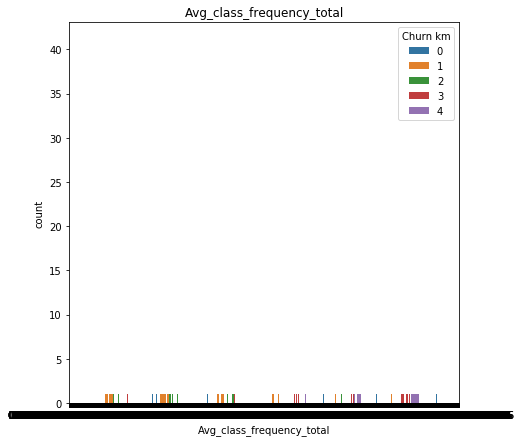

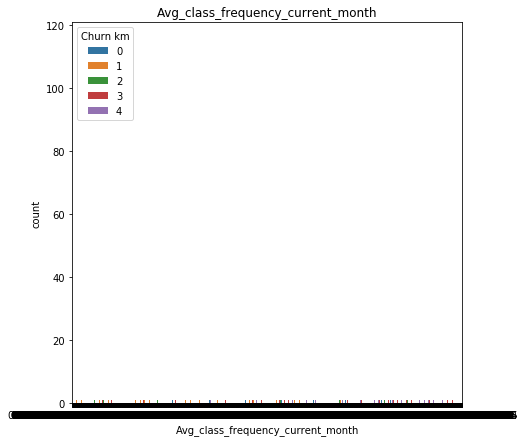

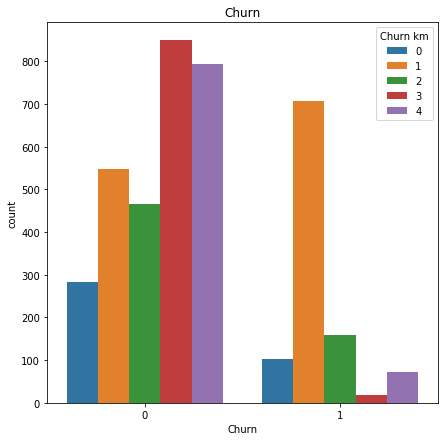

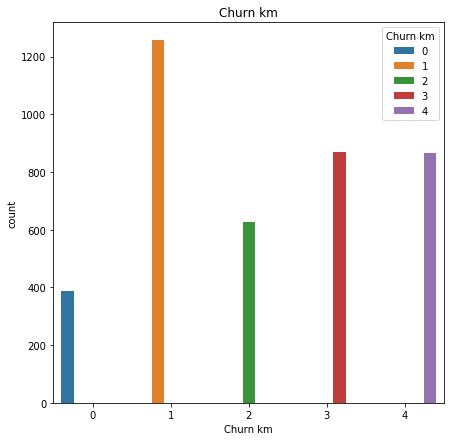

In [21]:
for column in data.columns:
    plt.figure(figsize=(7, 7))
    sns.countplot(x = data[column], hue='Churn km', data=data)
    plt.title(column)
    plt.show()

**Выводы:** 

У клиентов из "хороших" кластеров выше возраст - он около 30 лет.

Наибольшее количество групповых занятий.

Наибольшая суммарная выручка от других услуг фитнес-центра - около 160.

Наибольшее среднее время с момента первого обращения в фитнес-центр - 5 месяцев.

Самая высокая средняя частота посещений фитнес-центра.

## Расчёт доли оттока для каждого полученного кластера.

In [22]:
data.groupby('Churn km').agg({'Churn':'mean'}).sort_values(by='Churn')

,Churn
Churn km,
3,0.021889
4,0.082081
2,0.256000
0,0.266839
1,0.563694


Самый большой отток в кластере 2 - 59%, затем в 1 - 46% и 4 - 27%.

Надежные кластеры 3 и 1.

# Рекомендации по работе с клиентами

Портрет "идеального" клиента - ему около 30 лет, живет поблизости, часто посещает групповые занятия, приобретает абонемент на полгода и более, больше остальных использует другие услуги фитнес-центра.

В отток чаще всего попадают клиенты, которые, пришли попробовать позаниматься в зале, но что-то их не устроило. 
Эти клиент живут не так близко, либо не посещают групповые занятия. Гораздо реже посещают тренировки и берут абонементы на более короткий срок. Возможно, стоит подумать о какой-то бонусной программе для таких клиентов, чтобы приблизить их к "идеальному" клиенту и сократить отток.